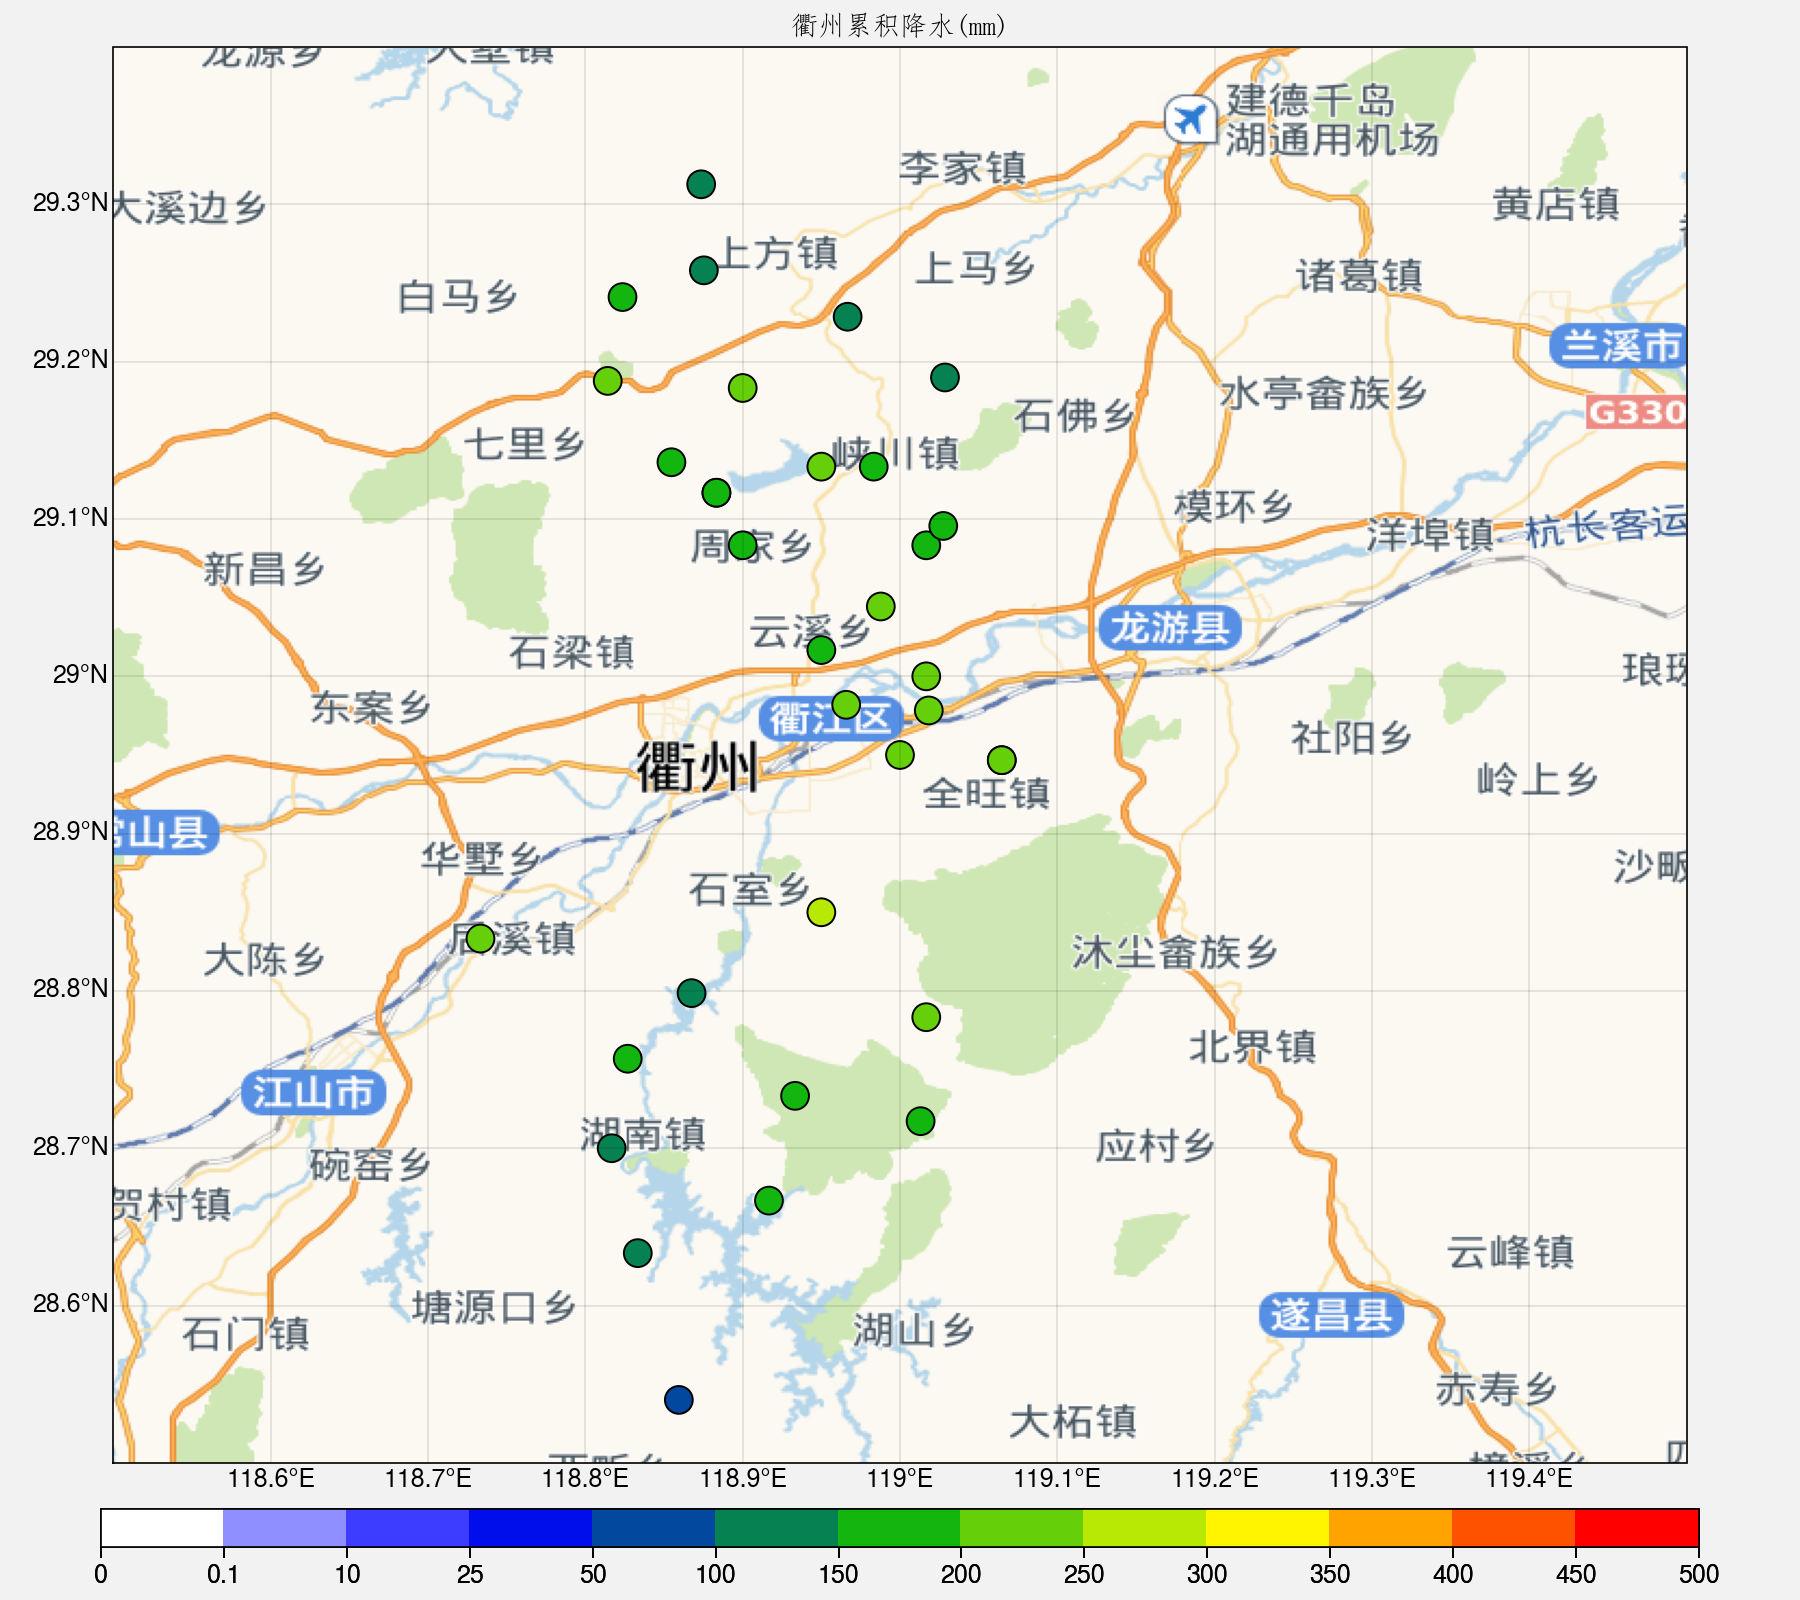

In [25]:
import os
import numpy as np
import pandas as pd
from matplotlib.path import Path
import xarray as xr
import proplot as plot
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
from cartopy.io.shapereader import Reader
from cartopy.mpl.patch import geos_to_path
from cartopy.feature import ShapelyFeature
from shapely.geometry import MultiPolygon
import cmaps

class TDT(cimgt.GoogleWTS):
    def _image_url(self, tile):
        x, y, z = tile
        # url = 'http://t3.tianditu.gov.cn/DataServer?T=vec_w&x=%s&y=%s&l=%s&tk=a4ee5c551598a1889adfabff55a5fc27'% (x, y, z)
        url = 'https://webst01.is.autonavi.com/appmaptile?x=%s&y=%s&z=%s&style=7'% (x, y, z)
        return url


fname = 'shapefiles/china.shp'
shape_records = Reader(fname).records()

chn_geoms = []
zj_geoms  = []
for country in shape_records:
    name = country.attributes['FCNAME'].rstrip('\x00')
    chn_geoms += [country.geometry]
    if name == '浙江省':
        zj_geoms  += [ country.geometry ]
chn_geoms = MultiPolygon(chn_geoms)
zj_geoms = MultiPolygon(zj_geoms)
# path   = Path.make_compound_path(*geos_to_path(geoms))

# 定义中文字体
cnfont = {'fontname':'simhei'}
cnfont_f = {'fontname':'fangsong'}


filename = 'ZHANDIAN.xlsx'
df       = pd.read_excel(filename,names=['name','id','lon','lat','pre'],sheet_name=0)

f, axs = plot.subplots(ncols=1, nrows=1, figsize=(9,8),proj='pcarree' )
axs.format(
#    labels=True,dms=False,latlines=0.5, lonlines=0.5,lonlim=(117.5, 122.5),latlim=(27, 31.3),
    labels=True,dms=False,latlines=0.1, lonlines=0.1,lonlim=(118.5, 119.5),latlim=(28.5, 29.4),
    suptitle='衢州累积降水(mm)',**cnfont_f
)

levels_s = [0,0.1,10,25,50,100,150,200,250,300,350,400,450,500]

im = axs[0].scatter(df['lon'].values, df['lat'].values, marker='o', c=df['pre'].values, s=100, lw=0.7, cmap=cmaps.WhBlGrYeRe, levels=levels_s,edgecolors='k')
axs[0].colorbar(im, loc='b', length=0.9,)
#axs[0].format(title='观测', **cnfont_f)

# shapfile
# shape_feature = ShapelyFeature(zj_geoms, ccrs.PlateCarree(), facecolor='none',edgecolor='k')
# axs.add_feature(shape_feature)
request = TDT()
axs[0].add_image(request, 10)